In [296]:
import struct
from decimal import Decimal
import random
import copy
import matplotlib.pyplot as plt
import networkx as nx
import math
import numpy as np

In [297]:
class PriorityQueue(object):
    """
    Implementation of the queue data structure
    """
    def __init__(self):
        self.l = 0
        self.queue = []      
    
    def enqueue(self, item):
        """
        Add new item to the queue
        """
        
        self.queue.append(item)
        self.l += 1
        j = self.l - 2
        while (j >= 0) and (item[1] < self.queue[j][1]):
            self.queue[j+1] = self.queue[j]
            j -= 1
        self.queue[j+1] = item    
        
    def dequeue(self):
        """
        Remove item with lowest key
        """
        x = self.queue[self.l-1]
        self.l -= 1
        return x[1]

In [298]:
#Chat GPT
def bit_array_to_float(bit_array):
    bytes_data = bytes([int(''.join(map(str, bit_array[i:i+8])), 2) for i in range(0, len(bit_array), 8)])
    float_value = struct.unpack('d', bytes_data)[0]
    return float_value
def float_to_bit_array(f):
    packed_data = struct.pack('d', f)
    bit_array = []
    for byte in packed_data:
        bits = bin(byte)[2:].rjust(8, '0') 
        bit_array.extend(map(int, bits))
    return bit_array

In [299]:
def int_to_binary(number,bits_capacity):
    bit = []
    temp = number
    while temp > 0:
        bit.append(temp%2)
        temp = temp//2
    while len(bit) < bits_capacity:
        bit.append(0)
    while len(bit) > bits_capacity:
        bit.pop()
    return bit[::-1]
def encoder(array,bits):
    chromosome = []
    for i in array:
        chromosome += int_to_binary(i,bits)
    return chromosome
def decoder(chromosome,bits):
    suma = 0
    temp = []
    decoded = []
    for i in chromosome:
        if len(temp) < bits:
            temp.append(i)
        if len(temp) == bits:
            while len(temp):
                suma = suma + temp.pop(0)*(2**(len(temp)))
            decoded.append(suma)
            suma = 0
    return decoded

In [300]:
def is_in_list(number,list):
    for i in list:
        if number == i:
            return True
    return False

In [301]:
def plots(data,x_label,y_label,title):
    plt.plot(data)
    plt.grid(True)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

In [546]:
#Chat GPT
def flatten_list(nested_list):
    flat_list = []
    for item in nested_list:
        if isinstance(item, list):
            flat_list.extend(flatten_list(item))
        else:
            flat_list.append(item)
    return flat_list


# Deber 2 

### Algoritmos inspirados en la Biología

Implementación de los algoritmos basados en la biología:

* Algoritmo Genérico (AG)
* Particle Swarm Optimization (PSO)
* Ant Colony Optimization (ACO)
* Gray Wolf Optimization (GWO)

## 1) Algoritmo Genético (GA)

Escriba una implementación de
algoritmos genéticos que permita tener una representación binaria de cada
cromosoma, y que reciba hiperparámetros como: número de bits para el cromosoma,
probabilidad de mutación, tamaño de población, función de fitness, tamaño de la élite
para generación de la siguiente población, criterio de evaluación para ordenar y
número máximo de iteraciones/épocas. Y con este algoritmo, encuentre soluciones
para los siguientes problemas.

* Función de Beale: tal como trabajaron previamente en los ejercicios de clase. Asegúrense que su representación cromosómica permita tener de forma efectiva números negativos y números decimales.
* Travelling Salesman Problem: para este problema encuentre un esquema para
representar una solución a este problema, y busque soluciones para grafos
completamente conectados para tamaños (número de nodos): 50, 100 y 150.

### Resolución

En primer lugar creo funciones para inicializar mi espacio de búsqueda de forma aleatoria

Beale Implementation

In [302]:
def evaluation(x,y):
    x = Decimal(x)
    y = Decimal(y)
    
    z = (Decimal(1.5) - x + x*y)**2 + (Decimal(2.25) - x + x*y*y)**2 + (Decimal(2.625) - x + x*y*y*y)**2
    z = float(z)
    return z

def individuo_init():
    xy = []
    x = random.uniform(-4.5,4.5)
    y = random.uniform(-4.5,4.5)

    z = evaluation(x,y)

    xy.append(x)
    xy.append(y)
    
    return xy

def population(N):
    people = []
    for i in range(N):
        indiv = individuo_init()
        people.append(indiv)
    return people

def bit_indiv(best_10_people):
    bits = []
    for i in best_10_people:
        x = float_to_bit_array(i[0][0])
        y = float_to_bit_array(i[0][1])
        bits.append (x + y)
    return bits 

Población para Travelling Salesman

In [303]:
def travelling_salesman_population(N, cities):
    people = []
    temp = [0]
    bits = math.ceil(math.log2(cities+1))
    for i in range(N):
        while len(temp) != cities:
            number = random.randint(1,cities-1)
            if not is_in_list(number,temp):
                temp.append(number)
            chromosome = encoder(temp,bits)
        people.append(chromosome)   
        chromosome = []  
        temp = [0]    
    return people

def travelling_salesman_weights(range_weights,cities):
    matrix = []
    for i in range(cities):
        temp = []
        for j in range(cities):
            if i!=j:
                temp.append(random.randint(range_weights[0],range_weights[1]))
            else:
                temp.append(0)
        matrix.append(temp)
    return matrix

Fitness

Beale Function

In [304]:
def fitness_Beale(people,bits,weights):
    #Fitness para Funcion de Beale
    people_sorted = PriorityQueue()
    for i in range(len(people)):
        indiv = people[i]
        people_sorted.enqueue([indiv,evaluation(indiv[0],indiv[1])])
    return people_sorted

Travelling Salesman

In [305]:
def travelling_salesman_fitness(population,bits,weights):
    sorted_population = PriorityQueue()
    suma = 0
    for i in population:
        element = decoder(i,bits)
        for j in range(0,len(element)-1):
            suma = suma + weights[element[j]][element[j+1]]
        suma = suma + weights[element[len(element)-1]][0]
        sorted_population.enqueue([i,suma])
        suma = 0
        if sorted_population.l == len(population):
            break
    return sorted_population
    

Crossover scheme

* Beale Function

In [306]:
def crossover_Beale(data,N,bits):
    bits_10_people = bit_indiv(data)
    temp = copy.deepcopy(bits_10_people)
    next_generation = []
    while len(temp):
        p1 = round(random.uniform(0,len(temp)-1))
        p1 = temp.pop(p1)
        p2 = round(random.uniform(0,len(temp)-1))
        p2 = temp.pop(p2)
        pivot = random.randint(0,127)
  
        child1 = p1[0:pivot] + p2[pivot:]
        child2 = p2[0:pivot] + p1[pivot:]
        next_generation.append(child1)

        if len(next_generation) == N:
            break

        next_generation.append(child2)

        if len(next_generation) < N and len(temp) ==0:
            temp = copy.deepcopy(bits_10_people)
        
    return next_generation

* Travelling Salesman

In [307]:
def is_valid_pivot(pivot,bits):
    if pivot%bits != 0:
        return False
    else:
        return True

def chromosomes_not_repeated(alelo,chromosome):
    while len(alelo) != len(chromosome):
        prev = None
        node = None
        i = 0
        estado = False
        while i < len(chromosome):
            node = chromosome[i]
            if prev == alelo[len(alelo)-1]:
                estado = True
            if estado:
                if not is_in_list(node,alelo):
                    alelo.append(node)
                    prev = node
            if i == len(chromosome)-1 and len(alelo) != len(chromosome):
                i = 0
                prev = node
            else:
                i += 1
                prev = node

def travelling_salesman_crossover(data,N,bits):
    temp = copy.deepcopy(data)
    next_generation = []
    while len(next_generation) != N:
        p1 = random.randint(0,len(temp)-1)
        p2 = random.randint(0,len(temp)-1)
        while p2 == p1:
            p2 = random.randint(0,len(temp)-1)
        p1 = temp[p1][0]
        p2 = temp[p2][0]

        p1 = decoder(p1,bits)
        p2 = decoder(p2,bits)

        pivot = random.randint(1, len(p1)-1)
        alelo1 = p1[0:pivot]
        alelo2 = p2[0:pivot]

        chromosomes_not_repeated(alelo1,p2)
        chromosomes_not_repeated(alelo2,p1)

        next_generation.append(encoder(alelo1,bits))
        if len(next_generation) == N:
            break
        next_generation.append(encoder(alelo2,bits))
        if len(next_generation) < N and len(temp) <= 1:
            temp = copy.deepcopy(data)
    return next_generation

Mutation scheme

* Beale Function

In [308]:
def function_mutation(next_generation,bits,p_mutate):
    new_generation = []
    for i in next_generation:
        probability = round(random.uniform(0,p_mutate*100))
        mutate = False
        if probability <= 10:
            mutate = True
        if mutate:
            index = round(random.uniform(0,127))
            if i[index] == 0:
                i[index] = 1
            else:
                i[index] = 0
        x = i[0:64]
        x = bit_array_to_float(x)
        y = i[64:]
        y = bit_array_to_float(y)
        new_generation.append([x,y])

    return new_generation

* Travelling Salesman

In [309]:
def travelling_salesman_mutation(next_generation,bits,p_mutate):
    for i in next_generation:
        probability = round(random.uniform(0,p_mutate*100))
        mutate = False
        if probability <= 10:
            mutate = True
            
        if mutate:
            temp = decoder(i,bits)
            p1 = random.randint(0,len(temp)-1)
            p2 = random.randint(0,len(temp)-1)
            while p2 == p1:
                p2 = random.randint(0,len(temp)-1)
            stored = temp[p1]
            temp[p1] = temp[p2]
            temp[p2] = stored
    return next_generation

Elitismo

In [310]:
def elite(fitted_data,size):
    return fitted_data.queue[0:size]

Algoritmo Genérico

In [311]:
def genetic_algo(initial_population, bits, p_mutate, N, fitness, elite_size, epochs, weights,crossover,mutation):
    best_of_epoch = []
    for i in range(epochs):
        fitted_data = fitness(initial_population,bits,weights)
        best_of_epoch.append(fitted_data.queue[0])
        best_N_population = elite(fitted_data,elite_size)
        new_generation = crossover(best_N_population, N,bits)
        mutated_generation = mutation(new_generation,bits,p_mutate)
        initial_population = mutated_generation

    fitted_data = fitness(initial_population,bits,weights)  
    best_of_epoch.append(fitted_data.queue[0])
    return best_of_epoch

Function Beale Testbench

In [332]:
N = 100
epochs = 100
bits = 64
mutation_prob = 0.1
elite_size = 10
initial_population = population(N)
weights = []

convergence = genetic_algo(initial_population,bits,mutation_prob
                           ,N,fitness_Beale,elite_size,epochs,
                           weights,crossover_Beale,function_mutation)

x = []
y = []
min_value = []
for i in convergence: x.append(i[0][0]),y.append(i[0][1]),min_value.append(i[1])

Final value of X: 3.000000000000005


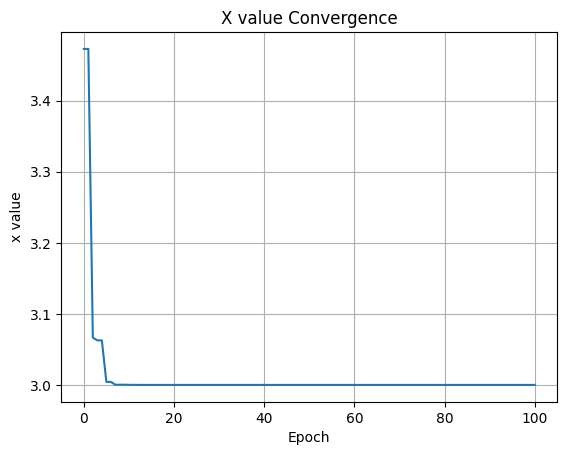

In [333]:
plots(x,'Epoch','x value','X value Convergence')
print("Final value of X: " + str(x[100]))

Final value of Y: 0.4999999999999982


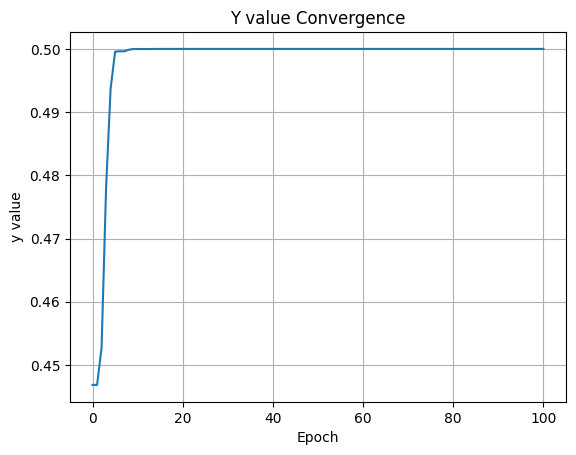

In [334]:
plots(y,'Epoch','y value','Y value Convergence')
print("Final value of Y: " + str(y[100]))


Final value of f(x,y): 2.0967984490532073e-28


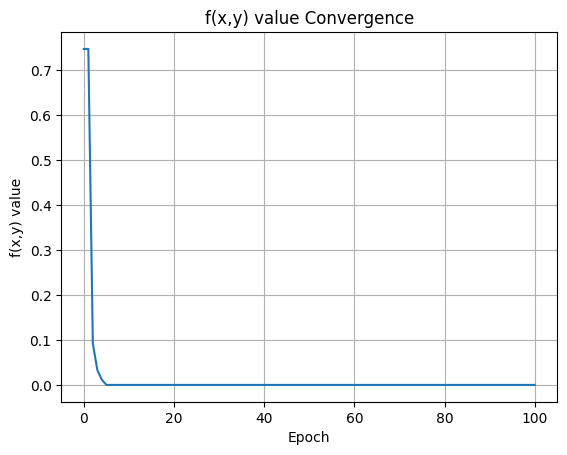

In [335]:
plots(min_value,'Epoch','f(x,y) value','f(x,y) value Convergence')
print("Final value of f(x,y): " + str(min_value[100]))


Traveller Salesman Testbench

In [316]:
N = 100
epochs = 100
cities = 10
bits = math.ceil(math.log2(cities+1))
mutation_prob = 0.1
elite_size = 10
initial_population = travelling_salesman_population(N, cities)

weights = travelling_salesman_weights([1,100],cities)

solution = genetic_algo(initial_population,bits,mutation_prob,N,travelling_salesman_fitness,elite_size,epochs,weights,travelling_salesman_crossover,travelling_salesman_mutation)
min_value = []
path = []
for i in solution: path.append(decoder(i[0],bits)),min_value.append(i[1])

print("Cost Matrix")
for i in weights:print(i)

Cost Matrix
[0, 89, 42, 86, 19, 4, 62, 91, 63, 78]
[21, 0, 35, 2, 23, 63, 25, 92, 32, 1]
[18, 31, 0, 4, 58, 97, 8, 89, 84, 93]
[51, 96, 60, 0, 15, 24, 18, 87, 71, 10]
[12, 91, 48, 71, 0, 27, 39, 91, 8, 72]
[82, 94, 56, 85, 40, 0, 31, 34, 90, 99]
[88, 73, 86, 61, 9, 45, 0, 40, 91, 80]
[33, 63, 27, 26, 30, 13, 46, 0, 26, 78]
[10, 52, 7, 22, 6, 81, 69, 76, 0, 79]
[56, 66, 67, 77, 61, 47, 98, 23, 27, 0]


In [317]:
#Fuente Chat GPT
def plotting(cities,paths):
    print("Path inicial: " + str(path[0]) +", cost of: " + str(min_value[0]))
    print("Path final: " + str(path[len(path)-1]) +", cost of: " + str(min_value[len(min_value)-1]))
    
    G = nx.complete_graph(cities)  

    edge_colors = {}
    color_map = ['r', 'g', 'b', 'c', 'm', 'y']

    for i, p in enumerate(paths):
        color = color_map[i % len(color_map)]
        for j in range(len(p) - 1):
            edge = (p[j], p[j + 1])
            edge_colors[edge] = color

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='k', font_color='w')

    for edge, color in edge_colors.items():
        nx.draw_networkx_edges(G, pos, edgelist=[edge], edge_color=color)

    legend_labels = [f'Path {i+1}' for i in range(len(paths))]
    legend_colors = color_map[:len(paths)]
    legend_handles = [plt.Line2D([0], [0], color=color, label=label) for label, color in zip(legend_labels, legend_colors)]
    plt.legend(handles=legend_handles, loc='upper left')

    plt.show()

10 Nodos

Path inicial: [0, 6, 5, 7, 1, 2, 8, 3, 4, 9], cost of: 285
Path final: [0, 3, 6, 5, 2, 8, 4, 7, 9, 1], cost of: 211


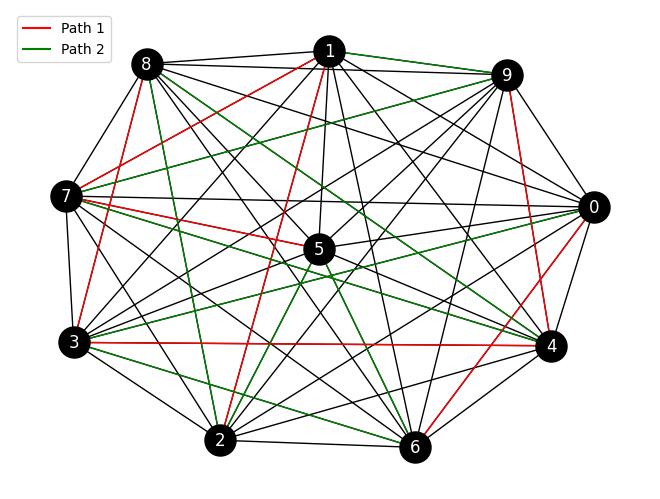

In [318]:
N = 100
epochs = 100
cities = 10
bits = math.ceil(math.log2(cities+1))
mutation_prob = 0.1
elite_size = 10
initial_population = travelling_salesman_population(N, cities)

weights = travelling_salesman_weights([1,100],cities)

solution = genetic_algo(initial_population,bits,mutation_prob,N,travelling_salesman_fitness,elite_size,epochs,weights,travelling_salesman_crossover,travelling_salesman_mutation)
min_value = []
path = []
for i in solution: path.append(decoder(i[0],bits)),min_value.append(i[1])

plotting(cities,[path[0],path[len(path)-1]])


Initial cost: 285
Final cost: 211


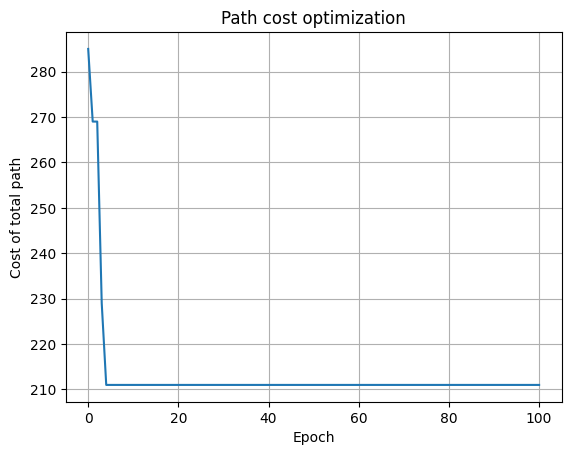

In [319]:
plots(min_value,'Epoch','Cost of total path','Path cost optimization')
print("Initial cost: " + str(min_value[0]))
print("Final cost: " + str(min_value[len(min_value)-1]))

50 nodos

Path inicial: [0, 6, 31, 20, 24, 13, 28, 43, 22, 7, 14, 44, 11, 48, 26, 17, 3, 1, 49, 34, 32, 46, 10, 27, 35, 16, 15, 18, 39, 47, 5, 41, 25, 36, 37, 4, 38, 45, 2, 33, 12, 40, 19, 29, 30, 42, 21, 9, 8, 23], cost of: 2038
Path final: [0, 41, 4, 28, 25, 36, 38, 45, 2, 33, 26, 3, 32, 23, 27, 44, 22, 39, 5, 40, 31, 8, 18, 37, 19, 43, 21, 11, 10, 7, 24, 35, 47, 46, 17, 29, 1, 16, 15, 20, 13, 49, 48, 9, 30, 12, 14, 34, 6, 42], cost of: 1541


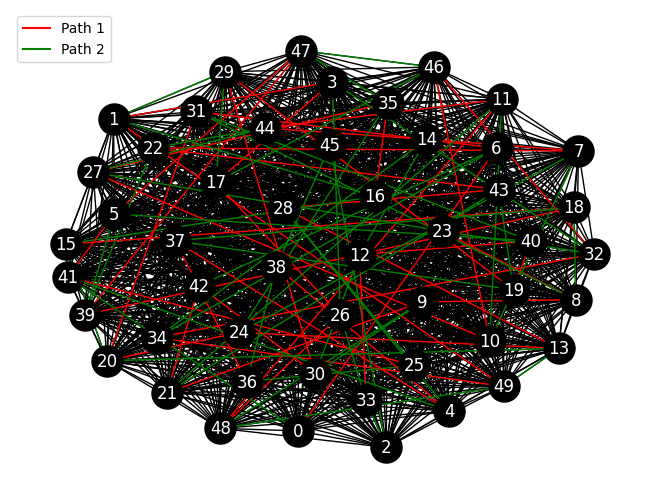

In [320]:
N = 100
epochs = 100
cities = 50
bits = math.ceil(math.log2(cities+1))
mutation_prob = 0.1
elite_size = 10
initial_population = travelling_salesman_population(N, cities)

weights = travelling_salesman_weights([1,100],cities)

solution = genetic_algo(initial_population,bits,mutation_prob,N,travelling_salesman_fitness,elite_size,epochs,weights,travelling_salesman_crossover,travelling_salesman_mutation)
min_value = []
path = []
for i in solution: path.append(decoder(i[0],bits)),min_value.append(i[1])

plotting(cities,[path[0],path[len(path)-1]])

Initial cost: 2038
Final cost: 1541


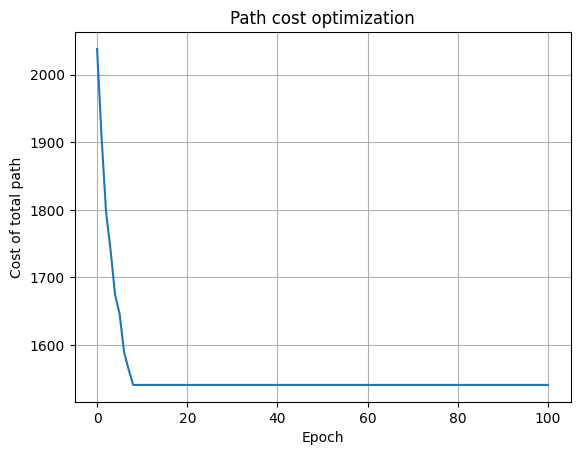

In [321]:
plots(min_value,'Epoch','Cost of total path','Path cost optimization')
print("Initial cost: " + str(min_value[0]))
print("Final cost: " + str(min_value[len(min_value)-1]))

100 nodos

Path inicial: [0, 30, 12, 68, 55, 42, 70, 89, 97, 78, 25, 31, 91, 11, 23, 13, 54, 49, 46, 74, 57, 51, 16, 85, 52, 77, 36, 4, 71, 39, 86, 28, 87, 75, 10, 66, 22, 35, 44, 9, 1, 64, 69, 18, 32, 72, 76, 63, 93, 48, 5, 21, 20, 58, 84, 83, 53, 67, 59, 62, 24, 33, 45, 92, 14, 56, 95, 7, 81, 29, 27, 60, 47, 26, 34, 38, 88, 43, 37, 98, 19, 99, 50, 80, 41, 79, 3, 40, 2, 94, 61, 90, 82, 17, 73, 8, 65, 15, 6, 96], cost of: 4373
Path final: [0, 23, 84, 38, 8, 53, 45, 54, 98, 43, 35, 93, 69, 19, 29, 39, 3, 70, 32, 86, 17, 44, 42, 76, 55, 36, 51, 14, 92, 6, 82, 96, 65, 15, 30, 12, 89, 78, 31, 91, 11, 47, 25, 13, 49, 46, 74, 16, 85, 52, 77, 71, 28, 87, 10, 66, 22, 9, 1, 64, 18, 72, 63, 5, 24, 21, 33, 83, 59, 27, 60, 20, 62, 7, 81, 26, 34, 88, 37, 68, 73, 57, 48, 56, 95, 4, 75, 94, 97, 40, 58, 67, 61, 99, 50, 80, 41, 79, 2, 90], cost of: 3371


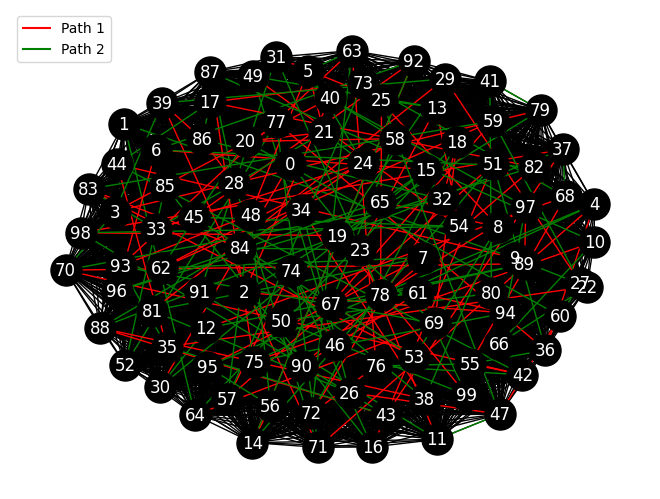

In [322]:
N = 100
epochs = 100
cities = 100
bits = math.ceil(math.log2(cities+1))
mutation_prob = 0.1
elite_size = 10
initial_population = travelling_salesman_population(N, cities)

weights = travelling_salesman_weights([1,100],cities)

solution = genetic_algo(initial_population,bits,mutation_prob,N,travelling_salesman_fitness,elite_size,epochs,weights,travelling_salesman_crossover,travelling_salesman_mutation)
min_value = []
path = []
for i in solution: path.append(decoder(i[0],bits)),min_value.append(i[1])

plotting(cities,[path[0],path[len(path)-1]])

Initial cost: 4373
Final cost: 3371


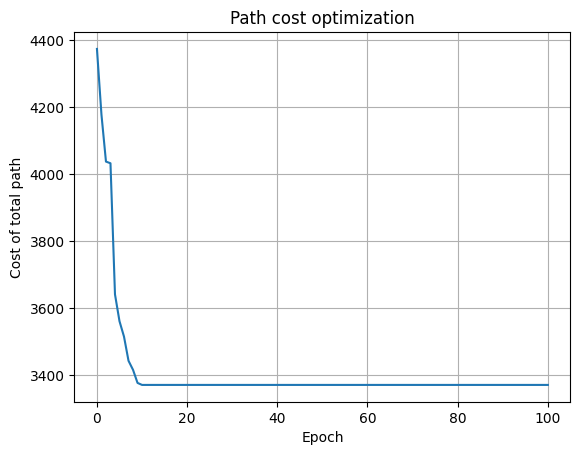

In [323]:
plots(min_value,'Epoch','Cost of total path','Path cost optimization')
print("Initial cost: " + str(min_value[0]))
print("Final cost: " + str(min_value[len(min_value)-1]))

150 nodos

Path inicial: [0, 88, 108, 97, 127, 66, 117, 44, 113, 17, 67, 128, 1, 105, 123, 77, 91, 100, 138, 48, 80, 34, 143, 30, 38, 4, 95, 111, 139, 41, 13, 57, 47, 6, 135, 126, 29, 18, 75, 137, 23, 35, 107, 92, 64, 112, 149, 101, 39, 106, 14, 37, 22, 132, 125, 84, 134, 110, 33, 130, 93, 86, 81, 83, 98, 24, 62, 115, 90, 133, 42, 140, 146, 32, 56, 20, 145, 65, 19, 129, 15, 5, 11, 9, 58, 85, 94, 141, 119, 96, 72, 28, 79, 55, 45, 3, 43, 142, 52, 82, 2, 74, 7, 122, 36, 76, 26, 60, 10, 51, 40, 31, 78, 49, 109, 131, 70, 61, 116, 12, 144, 147, 73, 99, 16, 104, 27, 25, 69, 89, 148, 114, 102, 46, 68, 59, 103, 63, 21, 121, 54, 118, 53, 50, 8, 120, 71, 136, 124, 87], cost of: 6687
Path final: [0, 88, 108, 66, 117, 44, 17, 67, 128, 1, 105, 93, 115, 75, 98, 58, 87, 3, 133, 145, 101, 49, 134, 31, 28, 68, 81, 69, 52, 62, 78, 142, 95, 73, 79, 92, 103, 21, 27, 23, 29, 72, 147, 19, 104, 99, 9, 136, 84, 41, 47, 110, 61, 125, 4, 14, 8, 43, 149, 7, 135, 126, 35, 107, 24, 46, 36, 16, 118, 32, 55, 124, 130, 74, 89, 1

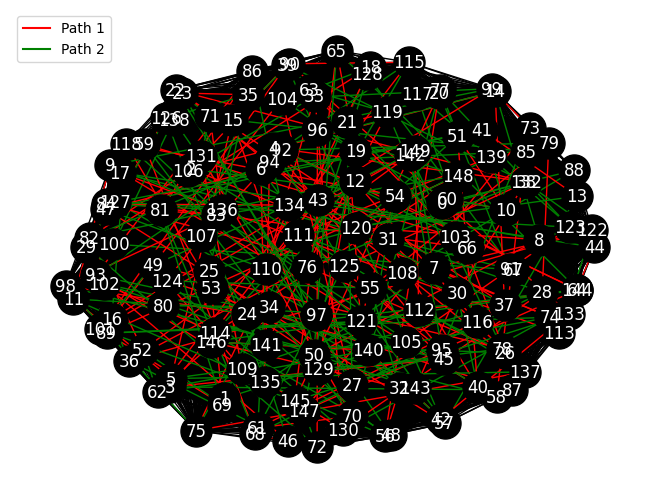

In [324]:
N = 100
epochs = 100
cities = 150
bits = math.ceil(math.log2(cities+1))
mutation_prob = 0.1
elite_size = 10
initial_population = travelling_salesman_population(N, cities)

weights = travelling_salesman_weights([1,100],cities)

solution = genetic_algo(initial_population,bits,mutation_prob,N,travelling_salesman_fitness,elite_size,epochs,weights,travelling_salesman_crossover,travelling_salesman_mutation)
min_value = []
path = []
for i in solution: path.append(decoder(i[0],bits)),min_value.append(i[1])

plotting(cities,[path[0],path[len(path)-1]])

Initial cost: 6687
Final cost: 5296


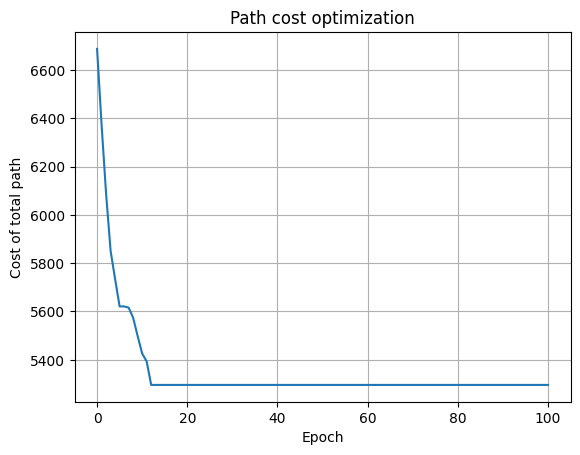

In [325]:
plots(min_value,'Epoch','Cost of total path','Path cost optimization')
print("Initial cost: " + str(min_value[0]))
print("Final cost: " + str(min_value[len(min_value)-1]))

## Particle Swarm Optimization Algorithm (PSO)

Escriba una
implementación de este algoritmo que permita recibir sus hiperparámetros, el número
de partíulas y el total de épocas a correr cada simulación.
* Función de Beale: tal como trabajaron previamente en los ejercicios de clase. Encuentre la solución óptima de la Función de Beale.
* Función de Rastrigin para A = 10, y n = 10: para este ejercicio, ejecute el algoritmo de optimización para las condiciones de esta función.

### Resolución

Implementation

In [578]:
def position_init(n,limits):
    x = []
    for i in range(n):
        x.append(random.uniform(limits[0],limits[1]))
    xy = np.array(x)
    return xy

def swarm(N,n,limits):
    S = []
    for i in range(N):
        indiv = position_init(n,limits)
        S.append(indiv)
    S = np.array(S)
    return S

def init_velocity_zero(N,n):
    vo = []
    temp = []
    for i in range(n): temp.append(0)
    for i in range(N):
        vo.append(copy.deepcopy(temp))
    vo = np.array(vo)
    return vo

def init_velocity_random(N):
    vo = []
    for i in range(N):
        vo.append([random.uniform(-2,2),random.uniform(-2,2)])
    vo = np.array(vo)
    return vo

def global_minima_index(P,function):
    F = evaluation(P,function)
    f_gi = []
    for i in range(len(F.shape)):
        if len(F.shape) == 1:
            f_gi.append(min(F))
        else:
            f_gi.append(min(F[:,i]))
    for i in range(len(F.shape)):
        g = np.where(F == f_gi[i])
    return g

def update_velocity(vio,g,P,S):
    alpha_1 = 1
    alpha_2 = 1
    phi_1 = random.uniform(0,1)
    phi_2 = random.uniform(0,1)
    
    vij = []
    vij = vio + alpha_1*phi_1*(P-S) + alpha_2*phi_2*(P[g] - S)
    vij = np.array(vij)
    return vij

In [452]:
def evaluation(S,funcion_op):
    pi = []
    if (len(S.shape) != 1):
        for i in S:
            pi.append(funcion_op(i))
    else:
        pi.append(funcion_op(S))
    return np.array(pi)

def beale_function(xi):
    x = Decimal(xi[0])
    y = Decimal(xi[1])

    z = (Decimal(1.5) - x + x*y)**2 + (Decimal(2.25) - x + x*y*y)**2 + (Decimal(2.625) - x + x*y*y*y)**2
    z = float(z)
    return z

Particle Swarm Optimization

In [579]:
def PSO(epoch,N,n,limits,velocity_setup,function_op):
    S = swarm(N,n,limits)
    vij = velocity_setup(N,n)
    P = copy.deepcopy(S)
    g = global_minima_index(P,function_op)
    x_convergence = []
    y_convergence = []
    z_convergence = []

    for i in range(epoch):
        vij = update_velocity(vij,g,P,S)
        S = S + vij
        for j in range(len(S)):
            if evaluation(S[j],function_op) < evaluation(P[j],function_op):
                P[j] = S[j]
        g = global_minima_index(P,function_op)
        
        x_convergence.append((P[g,0].flatten()).tolist())
        y_convergence.append((P[g,1].flatten()).tolist())
        z_convergence.append((evaluation(np.array(P[g]),function_op).flatten()).tolist())
        
    return [flatten_list(x_convergence),flatten_list(y_convergence),flatten_list(z_convergence)]

In [582]:
N = 100
epochs = 100
n = 2

resultados = PSO(epochs,N,n,[-4.5,4.5],init_velocity_zero,beale_function)

Final value of X: 3.008826634435755


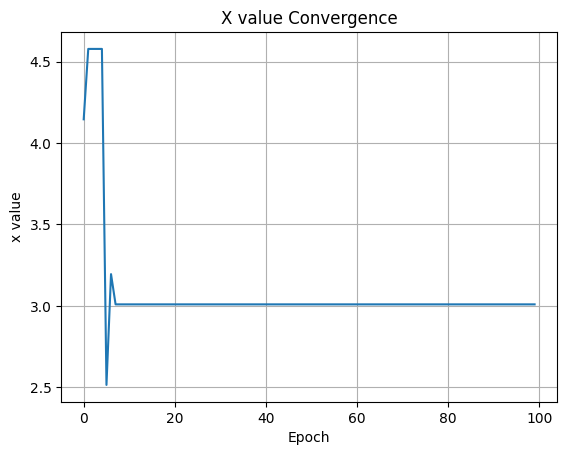

In [587]:
plots(resultados[0],'Epoch','x value','X value Convergence')
print("Final value of X: " + str(resultados[0][99]))

Final value of Y: 0.508025956591662


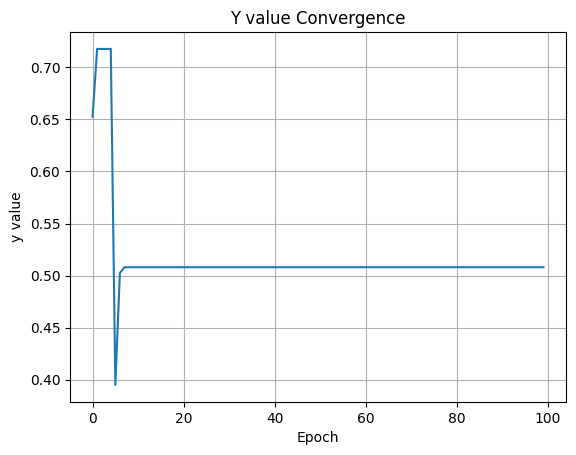

In [592]:
plots(resultados[1],'Epoch','y value','Y value Convergence')
print("Final value of Y: " + str(resultados[1][99]))

Final value of f(x,y): 0.0008176479541254811


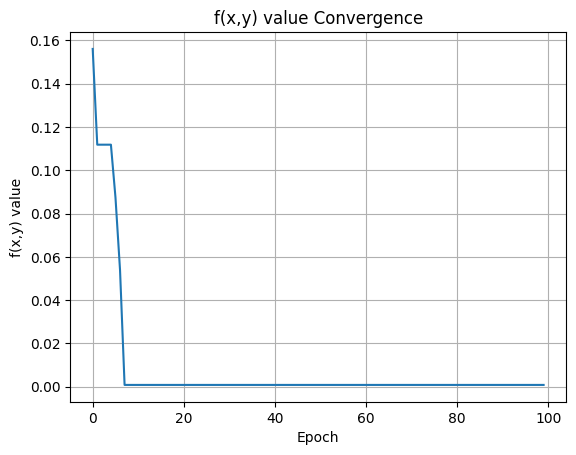

In [591]:
plots(resultados[2],'Epoch','f(x,y) value','f(x,y) value Convergence')
print("Final value of f(x,y): " + str(resultados[2][99]))

* Rastrigin Function